 # <center> Baby Destination Assignment Project-1 </center>
 
Post Data: Daily data give for Reach, Impression, Click for 3 content types Photo, Link and Video.
1. Create a monthly table that shows monthly reach, impression and clicks for each of the content type for the below months.
2. Show monthly changes in reach for each of the content type for the below months.

<ul>
    <li> Jan-16
    <li> Feb-16
    <li> Mar-16
    <li> Apr-16
    <li> May-16
</ul>


<h1> Table of Content </h1>

<ol>
        <li><a href="#ref1">Import Required libraries</a></li>
        <li><a href="#ref2">Acquiring the Data</a></li>
        <li><a href="#ref3">Preprocessing</a></li>
        <li><a href="#ref4">Create a monthly table that shows monthly reach, impression and clicks for each of the content type for the below months.</a></li>
        <li><a href="#ref5">Show monthly changes in reach for each of the content type for the below months.</a></li>
</ol>

<a id="ref1"></a>
## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id="ref2"></a>
## 2. Acquiring the Data

Lets import the Post Data sheet from the excel file

In [2]:
df1= pd.read_excel(r"C:\Users\user\Downloads\Reporting Assignment.xlsx")

#### 2.1 Read first 5 rows from the dataset

In [3]:
df1.head()

,Post ID,content type,Date posted,click,reach,impression
0,917697664961970_921719407893129,Photo,2015-08-11 00:00:00,11,17,1
1,917697664961970_922187454512991,Photo,2015-08-11 00:00:00,23,54,5
2,917697664961970_922176597847410,Photo,2015-08-11 00:00:00,9,16,9
3,917697664961970_921722437892826,Photo,2015-08-11 00:00:00,0,0,0
4,917697664961970_922199271178476,Link,2015-09-11 00:00:00,657,896,654


#### 2.2 Check the size of the dataset

In [4]:
df1.shape

(337, 6)

<a id="ref3"></a>
## 3. Preprocessing

#### 3.1 lets seperate the Date, year and month from "Date Posted" column using pandas DatetimeIndex function.

Create new columns for Date, Year, Month_Name, Month_Value

In [5]:
df1["Date"]=pd.DatetimeIndex(df1['Date posted']).date
df1["Year"]=pd.DatetimeIndex(df1['Date posted']).year
df1["Month"]=pd.DatetimeIndex(df1['Date posted']).month_name(locale = 'English')
df1["Month_value"]=pd.DatetimeIndex(df1['Date posted']).month
df1.head()

,Post ID,content type,Date posted,click,reach,impression,Date,Year,Month,Month_value
0,917697664961970_921719407893129,Photo,2015-08-11 00:00:00,11,17,1,2015-08-11,2015,August,8
1,917697664961970_922187454512991,Photo,2015-08-11 00:00:00,23,54,5,2015-08-11,2015,August,8
2,917697664961970_922176597847410,Photo,2015-08-11 00:00:00,9,16,9,2015-08-11,2015,August,8
3,917697664961970_921722437892826,Photo,2015-08-11 00:00:00,0,0,0,2015-08-11,2015,August,8
4,917697664961970_922199271178476,Link,2015-09-11 00:00:00,657,896,654,2015-09-11,2015,September,9


#### 3.2 Lets drop the "Date Posted" column as we have extracted the date in a new column to keep all the dates in same format

In [6]:
df1=df1.drop("Date posted", axis=1)
df1.head()

,Post ID,content type,click,reach,impression,Date,Year,Month,Month_value
0,917697664961970_921719407893129,Photo,11,17,1,2015-08-11,2015,August,8
1,917697664961970_922187454512991,Photo,23,54,5,2015-08-11,2015,August,8
2,917697664961970_922176597847410,Photo,9,16,9,2015-08-11,2015,August,8
3,917697664961970_921722437892826,Photo,0,0,0,2015-08-11,2015,August,8
4,917697664961970_922199271178476,Link,657,896,654,2015-09-11,2015,September,9


#### 3.3 We need data of only year 2016 for our analysis, so lets create a new dataframe with only 2016 data

In [7]:
df1_2016=df1[df1.Year==2016]
df1_2016.head()

,Post ID,content type,click,reach,impression,Date,Year,Month,Month_value
111,917697664961970_946771375387932,Photo,276,517,260,2016-01-01,2016,January,1
112,917697664961970_947688991962837,SharedVideo,1074,1921,866,2016-03-01,2016,March,3
113,917697664961970_948188678579535,Photo,0,0,0,2016-04-01,2016,April,4
114,917697664961970_948991915165878,Photo,0,0,0,2016-05-01,2016,May,5
115,917697664961970_949068701824866,Link,7037,13007,383,2016-05-01,2016,May,5


#### 3.4 Also we need data of only Jan till May 2016 , so lets filter these months from our new dataframe

In [8]:
df1_2016=df1_2016[df1_2016['Month'].isin(["January","February","March","April","May"])]
df1_2016.head()

,Post ID,content type,click,reach,impression,Date,Year,Month,Month_value
111,917697664961970_946771375387932,Photo,276,517,260,2016-01-01,2016,January,1
112,917697664961970_947688991962837,SharedVideo,1074,1921,866,2016-03-01,2016,March,3
113,917697664961970_948188678579535,Photo,0,0,0,2016-04-01,2016,April,4
114,917697664961970_948991915165878,Photo,0,0,0,2016-05-01,2016,May,5
115,917697664961970_949068701824866,Link,7037,13007,383,2016-05-01,2016,May,5


#### 3.5 check the size of the dataframe

In [9]:
df1_2016.shape

(170, 9)

 <a id="ref4"></a>
 ## 4: Create a monthly table that shows monthly reach, impression and clicks for each of the content type for the below months.

#### 4.1 Create Pivot table 

In [10]:
df_sum=df1_2016.pivot_table(index=["Month","Month_value","Year"],columns=["content type"], values=["click","reach","impression"],aggfunc=np.sum).round().fillna(0)
df_sum=df_sum.sort_values(by="Month_value",ascending=True)
df_sum

click                      impression           \
content type                   Link    Photo SharedVideo       Link    Photo   
Month    Month_value Year                                                      
January  1           2016   21214.0  32139.0         0.0     2728.0   7202.0   
February 2           2016   27779.0  36734.0         0.0     3426.0   8431.0   
March    3           2016   26914.0  45950.0      3362.0     2457.0   6221.0   
April    4           2016   38231.0  21057.0         0.0     8468.0   4761.0   
May      5           2016  106163.0  38150.0      1580.0    22275.0  14216.0   

                                          reach                       
content type              SharedVideo      Link    Photo SharedVideo  
Month    Month_value Year                                             
January  1           2016         0.0   36121.0  63546.0         0.0  
February 2           2016         0.0   48863.0  66897.0         0.0  
March    3           2016      1729.0   49458.0  81932.0      5460.0  
April    4           2016         0.0   68380.0  37561.0         0.0  
May      5           2016      1220.0  185622.0  70877.0      2563.0

#### 4.2 Export this file to excel

In [11]:
df_sum.to_excel(r"C:\Users\user\Desktop\Projects\Baby Destination Assignment\Output_Monthly_Table.xlsx")

<a id="ref5"></a>
## 5.  Show monthly changes in reach for each of the content type for the below months.

#### 5.1 Create Pivot table for reach values

In [14]:
df_reach=df1_2016.pivot_table(index=["Month","Month_value","Year"],columns=["content type"], values=["reach"],aggfunc=np.sum).round().fillna(0)
df_reach=df_reach.sort_values(by="Month_value",ascending=True)
df_reach

reach                     
content type                   Link    Photo SharedVideo
Month    Month_value Year                               
January  1           2016   36121.0  63546.0         0.0
February 2           2016   48863.0  66897.0         0.0
March    3           2016   49458.0  81932.0      5460.0
April    4           2016   68380.0  37561.0         0.0
May      5           2016  185622.0  70877.0      2563.0

#### 5.2 Lets plot a bar graph for the above dataframe

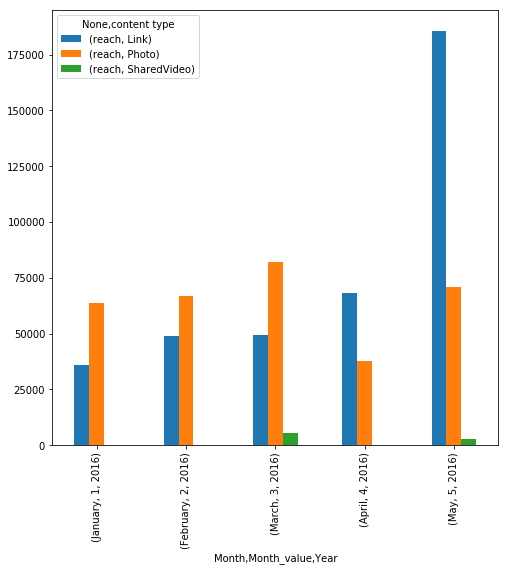

In [15]:
df_reach.plot(kind="bar",figsize=(8,8))